Install Required LIbraries

In [1]:
!pip install pandas numpy matplotlib scikit-learn yfinance

In [2]:
import yfinance as yf
import pandas as pd

In [3]:
# Fetch Bitcoin data
btc_data = yf.download('BTC-USD', start='2015-01-01', end='2025-02-18')


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
# Save to CSV for future use
btc_data.to_csv('bitcoin_price.csv')

In [24]:
# Display the first few rows
print(btc_data.head())

Price            Close        High         Low        Open    Volume
Ticker         BTC-USD     BTC-USD     BTC-USD     BTC-USD   BTC-USD
Date                                                                
2015-01-01  314.248993  320.434998  314.002991  320.434998   8036550
2015-01-02  315.032013  315.838989  313.565002  314.079010   7860650
2015-01-03  281.082001  315.149994  281.082001  314.846008  33054400
2015-01-04  264.195007  287.230011  257.612000  281.145996  55629100
2015-01-05  274.473999  278.341003  265.084015  265.084015  43962800


Data Preprocessing

In [25]:
import pandas as pd
import numpy as np

In [26]:
data = pd.read_csv('bitcoin_price.csv')

modified the 1st three rows directly in excel 

In [27]:
print(data)

            Date         Close          High           Low          Open  \
0     01-01-2015    314.248993    320.434998    314.002991    320.434998   
1     02-01-2015    315.032013    315.838989    313.565002    314.079010   
2     03-01-2015    281.082001    315.149994    281.082001    314.846008   
3     04-01-2015    264.195007    287.230011    257.612000    281.145996   
4     05-01-2015    274.473999    278.341003    265.084015    265.084015   
...          ...           ...           ...           ...           ...   
3696  13-02-2025  96623.867190  98111.085940  95269.710940  97888.750000   
3697  14-02-2025  97508.968750  98819.468750  96342.804690  96623.367190   
3698  15-02-2025  97580.351560  97975.039060  97240.195310  97508.382810   
3699  16-02-2025  96175.031250  97725.593750  96060.976560  97580.492190   
3700  17-02-2025  95773.382810  97032.234380  95243.546880  96179.007810   

            Volume  
0     8.036550e+06  
1     7.860650e+06  
2     3.305440e+07  
3  

In [28]:
# Load the data
data = pd.read_csv('bitcoin_price.csv', parse_dates=['Date'])


In [29]:
# Calculate daily returns
data['Returns'] = data['Close'].pct_change()

In [30]:
# Create lag features (previous day's price)
data['Lag_1'] = data['Close'].shift(1)
data['Lag_2'] = data['Close'].shift(2)


In [31]:
# Drop missing values
data.dropna(inplace=True)

In [32]:
# Features and target
X = data[['Lag_1', 'Lag_2']]  # Input features
y = data['Close']             # Target variable


In [33]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [34]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (2959, 2)
Testing set size: (740, 2)


ML Model

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [36]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
# Make predictions
y_pred = model.predict(X_test)

In [38]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 1485.24


Visualization of the Result

In [39]:
import matplotlib.pyplot as plt

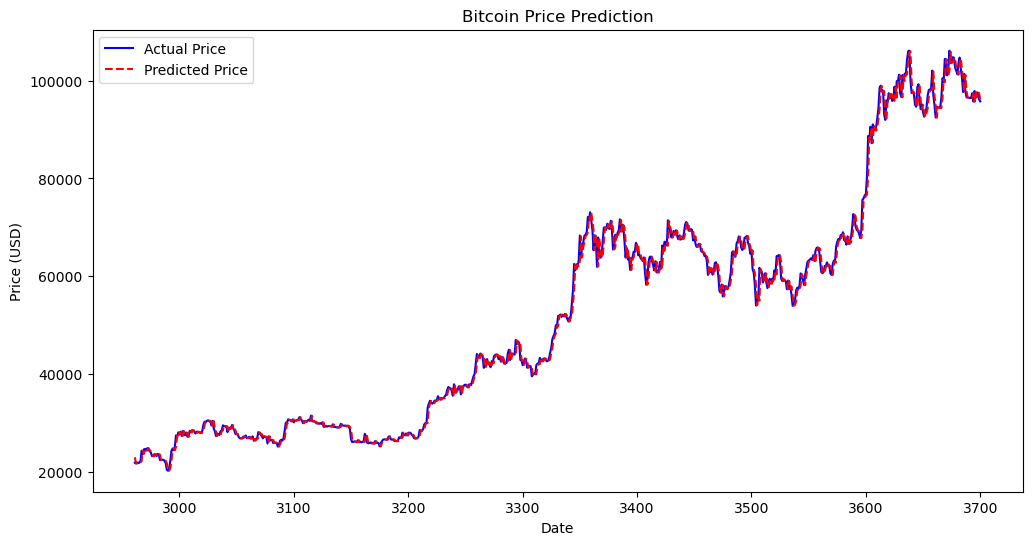

In [40]:
# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Price', color='blue')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Price', color='red', linestyle='--')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

Improving the model

In [41]:
# Add a 7-day moving average
data['MA_7'] = data['Close'].rolling(window=7).mean()

In [42]:
# Drop missing values again
data.dropna(inplace=True)

In [43]:
# Update features
X = data[['Lag_1', 'Lag_2', 'MA_7']]
y = data['Close']

In [44]:
# Retrain the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [45]:
# Evaluate the improved model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Improved RMSE: {rmse:.2f}")

Improved RMSE: 1465.89


Prediction of the Model

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [47]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [48]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [49]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 1465.89


In [50]:
# Display some predictions
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

           Actual     Predicted
2962  21651.18359  21858.305860
2963  21870.87500  21794.405878
2964  21788.20313  21983.037048
2965  21808.10156  21854.387159
2966  22220.80469  21852.921514
